[](http://)<h1>Red wine quality classifier using deep feedforward network</h1>

Data provided by the UCI:
     https://archive.ics.uci.edu/ml/datasets/wine+quality 

<h3>Imports</h3>

Libraries import

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder

Data import

In [2]:
wine_data = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
display(wine_data.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
display(wine_data.describe())
wine_data['quality'].value_counts()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<h3>Handling misssing data</h3>

In [4]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<h2>Exploratory Data Analysis</h2>

<h4>Correlation matrix</h4>

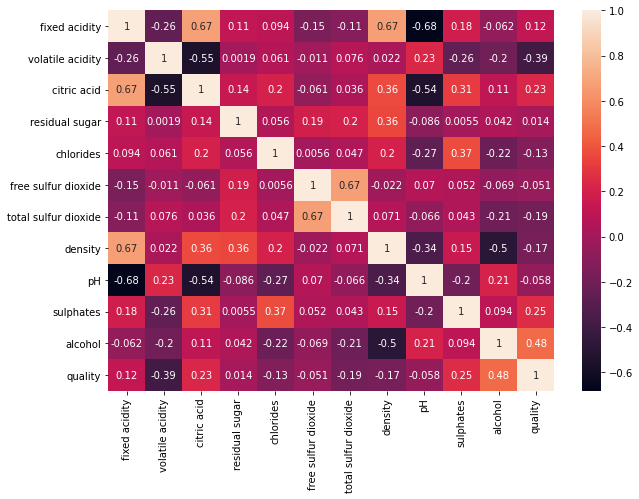

In [5]:
fig , ax = plt.subplots(figsize = (10,7))
sb.heatmap(wine_data.corr() , annot = True , ax = ax)
plt.show()

<h4>Scatter plot: Fixed acidity - Density</h4>

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

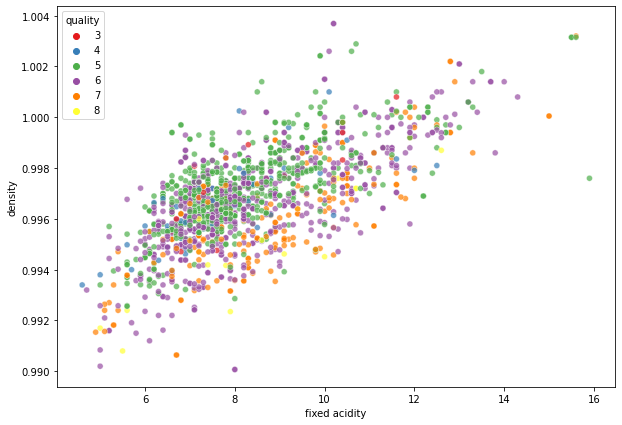

In [6]:
plt.figure(figsize = (10 , 7))
sb.scatterplot(x = "fixed acidity", y = "density", hue = "quality",data = wine_data, alpha = 0.7, palette = "Set1")

<h2>Data preprocessing</h2>

<h3>Features reduction</h3>

<h4>Using random forrest to analyse the feature importance</h4>

In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=12)
x = wine_data.drop(['quality'] , axis = 1)
wd = pd.get_dummies(wine_data)
model.fit(x, wine_data.quality)
display(model.feature_importances_)

array([0.05049791, 0.13604892, 0.04475298, 0.05247952, 0.05881777,
       0.0458654 , 0.07643178, 0.0515247 , 0.05821171, 0.14268737,
       0.28268191])

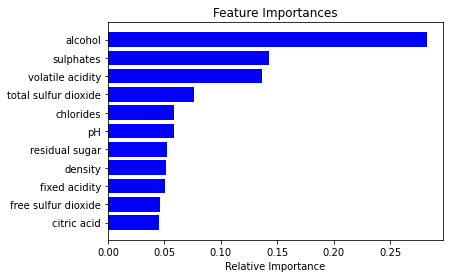

In [8]:
features = wd.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h4>Removing the least important feautres according to the random forrest results</h4>

In [9]:
del x['fixed acidity']
del x['free sulfur dioxide']
del x['citric acid']

<h4>Encoding the quality</h4>

In [10]:
le = LabelEncoder()
y = le.fit_transform(wine_data.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

### Data Over sampling using SMOTE

In [11]:
from imblearn.over_sampling import SMOTE

strategy = {0:1700, 1:1700, 2:1700, 3:1700, 4:1700, 5:1700}
oversample = SMOTE(sampling_strategy=strategy)
x, y = oversample.fit_resample(x, y)

/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (1700) in class 0 will be larger than the number of samples in the majority class (class #2 -> 681)
  f"After over-sampling, the number of samples ({n_samples})"
/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (1700) in class 1 will be larger than the number of samples in the majority class (class #2 -> 681)
  f"After over-sampling, the number of samples ({n_samples})"
/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (1700) in class 2 will be larger than the number of samples in the majority class (class #2 -> 681)
  f"After over-sampling, the number of samples ({n_samples})"
/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of sa

In [12]:
x.shape

(10200, 8)

<h4>Spliting data</h4>

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

<h4>Transforming quality to categorical data</h4>

In [14]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)

<h4>Scaling features</h4>

In [15]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

<h2>Machine learning modeling</h2>

<h3>Artificial neural network</h3>

In [16]:
ann = tf.keras.models.Sequential(layers = None , name = None)

In [17]:
ann.add(tf.keras.layers.Input(shape = 8,))

In [18]:
ann.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))

In [19]:
ann.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))

In [20]:
ann.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))

In [21]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
Total params: 334
Trainable params: 334
Non-trainable params: 0
_________________________________________________________________


In [22]:
ann.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])

In [23]:
history = ann.fit(x_train, y_train_cat,  batch_size= 32, epochs = 150 , validation_data = (x_test,y_test_cat))

Epoch 1/150
255/255 [==============================] - 1s 3ms/step - loss: 1.6480 - accuracy: 0.3161 - val_loss: 1.2409 - val_accuracy: 0.4838
Epoch 2/150
255/255 [==============================] - 0s 1ms/step - loss: 1.1792 - accuracy: 0.4998 - val_loss: 1.0526 - val_accuracy: 0.5676
Epoch 3/150
255/255 [==============================] - 0s 1ms/step - loss: 1.0362 - accuracy: 0.5609 - val_loss: 0.9747 - val_accuracy: 0.6078
Epoch 4/150
255/255 [==============================] - 0s 1ms/step - loss: 0.9590 - accuracy: 0.6004 - val_loss: 0.9352 - val_accuracy: 0.6069
Epoch 5/150
255/255 [==============================] - 0s 1ms/step - loss: 0.9333 - accuracy: 0.6044 - val_loss: 0.9034 - val_accuracy: 0.6113
Epoch 6/150
255/255 [==============================] - 0s 1ms/step - loss: 0.8954 - accuracy: 0.6187 - val_loss: 0.8818 - val_accuracy: 0.6284
Epoch 7/150
255/255 [==============================] - 0s 1ms/step - loss: 0.8756 - accuracy: 0.6233 - val_loss: 0.8673 - val_accuracy: 0.6324

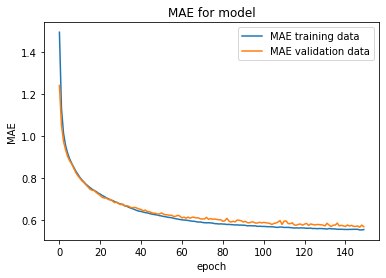

In [24]:
plt.plot(history.history['loss'], label='MAE training data')
plt.plot(history.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

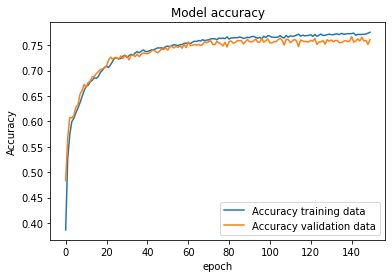

In [25]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()